In [50]:
import sys
sys.path.insert(0, '../')
from Models import potts
from Models.fastIsing import Ising
import networkx as nx, matplotlib.pyplot as plt, numpy as np

n = 10
g = nx.grid_2d_graph(n, n)
# g = nx.erdos_renyi_graph(n, .2)
# g = nx.complete_graph(50)


# states = np.arange(0, 1000).tolist()
states = np.arange(0, 2).tolist()
m =  potts.Potts(graph = g, \
                 agentStates = states,\
                 updateType = '.25')
# m =  Ising(graph = g, updateType = '0.25')
temps = np.logspace(-2, np.log10(m.nNodes),  20)
mag, sus = m.matchMagnetization(temps, 1000)







  0%|          | 0/20 [00:00<?, ?it/s]

Computing mag per t







 20%|██        | 4/20 [00:00<00:04,  3.27it/s]




 40%|████      | 8/20 [00:00<00:01,  7.40it/s]




 45%|████▌     | 9/20 [00:00<00:01,  7.40it/s]




 50%|█████     | 10/20 [00:00<00:01,  7.07it/s]




 55%|█████▌    | 11/20 [00:00<00:01,  5.82it/s]




 60%|██████    | 12/20 [00:00<00:01,  4.63it/s]




 65%|██████▌   | 13/20 [00:01<00:01,  3.72it/s]




 70%|███████   | 14/20 [00:01<00:01,  3.01it/s]




 75%|███████▌  | 15/20 [00:01<00:02,  2.50it/s]




 80%|████████  | 16/20 [00:01<00:01,  2.50it/s]




 85%|████████▌ | 17/20 [00:01<00:01,  2.25it/s]




 90%|█████████ | 18/20 [00:01<00:00,  2.24it/s]




 90%|█████████ | 18/20 [00:01<00:00,  2.24it/s]




 95%|█████████▌| 19/20 [00:01<00:00,  2.24it/s]




100%|██████████| 20/20 [00:01<00:00,  2.27it/s]




100%|██████████| 20/20 [00:01<00:00,  2.27it/s]




100%|██████████| 20/20 [00:01<00:00,  2.27it/s]




100%|██████████| 20/20 [00:01<00:00,  2.27it/s]

<IPython.core.display.Javascript object>


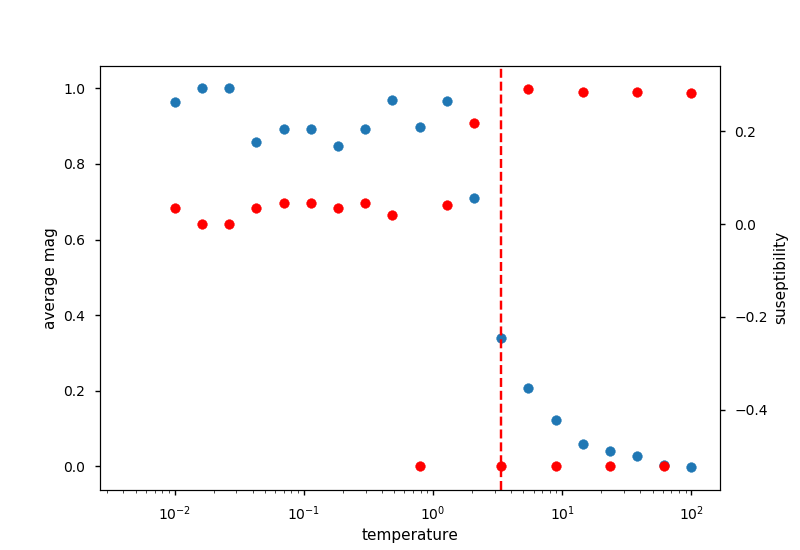

In [51]:
from matplotlib import style; style.use('seaborn-notebook')
fig, ax = plt.subplots()
ax.scatter(temps, mag)
tax = ax.twinx()
tax.scatter(temps, sus, color = 'red')
ax.set(xlabel = 'temperature', ylabel = 'average mag')
tax.set_ylabel('suseptibility')
idx = np.argmin(abs(mag - .5 * mag.max()))
ax.axvline(temps[idx], color = 'red', linestyle = 'dashed')
# ax.set(xlim = (0, 20))
ax.set(xscale = 'log')
fig.show()

<IPython.core.display.Javascript object>


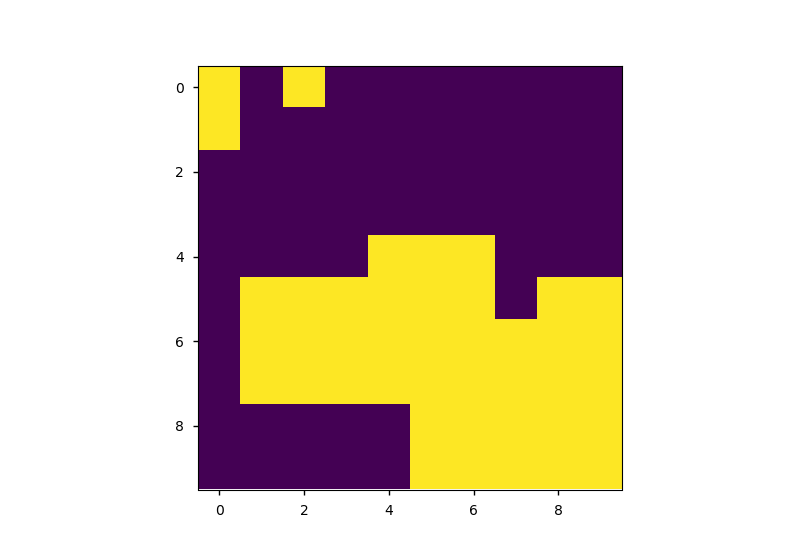

interactive(children=(IntSlider(value=0, description='time', max=9999), Output()), _dom_classes=('widget-inter…

In [52]:
%matplotlib notebook
import ipywidgets as ipy
m.reset()
res = m.simulate(10000)
fig, ax = plt.subplots()
h = ax.imshow(res[0].reshape(n, n))
fig.show()
@ipy.interact(time = ipy.widgets.IntSlider(min = 0, max = res.shape[0] - 1, value = 0))
def update(time):
    h.set_data(res[time].reshape(n, n))
    fig.canvas.draw(); fig.canvas.flush_events()
